In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Data Analysis

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Mode

In [7]:
df.mode()

,age,gender,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [8]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

# Without Encoding

In [9]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding

## Replace method

In [10]:
df1.gender = df1.gender.replace(['male', 'female'], [1, 2])
df1.smoker = df1.smoker.replace(['yes', 'no'], [1, 2])
df1.region = df1.region.replace(['southwest', 'southeast', 'northwest', 'northeast'], [1, 2, 3, 4])

In [11]:
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,2,2,1725.55230
2,28,1,33.000,3,2,2,4449.46200
3,33,1,22.705,0,2,3,21984.47061
4,32,1,28.880,0,2,3,3866.85520


## Correlation

In [12]:
df1.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
gender,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


<Axes: >

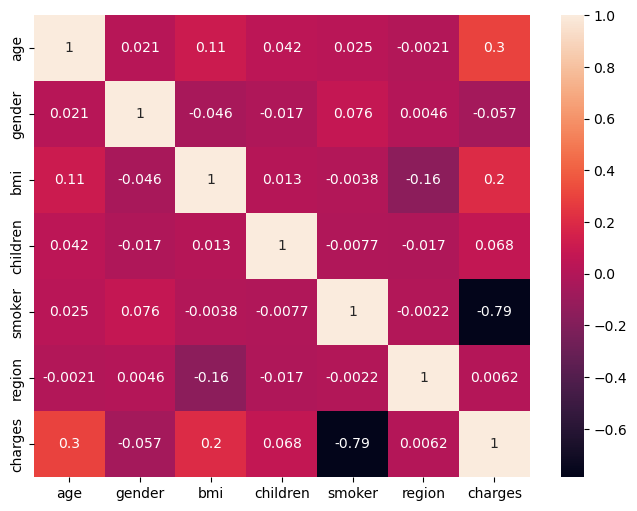

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)

# Label Encoding

In [14]:
df2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
le = LabelEncoder()

In [16]:
for col in df2.columns:
    if (not is_numeric_dtype(df2[col])):
        df2[col] = le.fit_transform(df2[col])

In [17]:
df2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Ordinal Encoding

In [18]:
df3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
for col in df3.columns:
    if (not is_numeric_dtype(df3[col])):
        od = OrdinalEncoder(categories=[df3[col].unique()])
        df3[col] = od.fit_transform(df3[[col]])

In [20]:
df3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,0.0,0.0,16884.92400
1,18,1.0,33.770,1,1.0,1.0,1725.55230
2,28,1.0,33.000,3,1.0,1.0,4449.46200
3,33,1.0,22.705,0,1.0,2.0,21984.47061
4,32,1.0,28.880,0,1.0,2.0,3866.85520


# One Hot Encoding

In [21]:
df4.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
for col in df4.columns:
    if (not is_numeric_dtype(df4[col])):
        dummy = pd.get_dummies(df4[col], drop_first=True, dtype=int, prefix=col)
        df4 = pd.concat([df4,dummy],axis=1).drop(col,axis=1)

In [23]:
df4.head()

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
